In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

In [2]:
dataset_dir = r'C:\Users\aakas\Dataset'

In [3]:
dataset_dir

'C:\\Users\\aakas\\Dataset'

In [4]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)
dataset_dir

WindowsPath('C:/Users/aakas/Dataset')

In [5]:
image_count = len(list(dataset_dir.glob('*/*.png')))
image_count

8982

In [6]:
images_dict = {
    'with_mask' : list(dataset_dir.glob('with_mask/*.png')),
    'without_mask' : list(dataset_dir.glob('without_mask/*.png')),
    'mask_weared_incorrect' : list(dataset_dir.glob('mask_weared_incorrect/*.png')),
}

In [7]:
labels_dict = {
    'with_mask' : 0 ,
    'without_mask' : 1 ,
    'mask_weared_incorrect' : 2 ,
}

In [8]:
x , y = [] , []
for labels , images in images_dict.items():
    print(labels)
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(labels_dict[labels])

with_mask
without_mask
mask_weared_incorrect


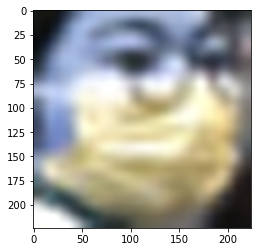

In [9]:
plt.imshow(x[100])

In [10]:
x_np = np.array(x)
y_np = np.array(y)

In [11]:
x_np.shape , y_np.shape

((8982, 224, 224, 3), (8982,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainX , testX , trainY , testY = train_test_split(x_np,y_np,random_state = 0, stratify = y_np) 

In [14]:
len(trainX),len(testX),len(trainY),len(testY)

(6736, 2246, 6736, 2246)

In [15]:
trainX_scaled = trainX/255
testX_scaled = testX/255

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.applications.vgg16 import VGG16

In [17]:
vgg = VGG16()

In [18]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
 model = models.Sequential()

In [20]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [22]:
for layer in model.layers:
    layer.trainable = False

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [24]:
model.add(layers.Dense(3, activation = 'sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [26]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [27]:
from keras.callbacks import ModelCheckpoint

In [39]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,mode='auto')
history = model.fit(trainX,trainY,epochs=5,validation_data=(testX,testY),callbacks=[checkpoint],batch_size =20)

Epoch 1/5
337/337 [==============================] - 2473s 7s/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0378 - val_accuracy: 0.9902
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/5
337/337 [==============================] - 2463s 7s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9893
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/5
337/337 [==============================] - 2164s 6s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9907
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/5
337/337 [==============================] - 2081s 6s/step - loss: 9.7246e-04 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9907
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/5
337/337 [==============================] - 2082s 6s/step - loss: 8.9147e-04 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9907
INFO:tensorflow:Assets written to: model-005.

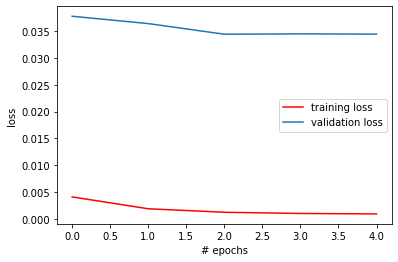

In [40]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

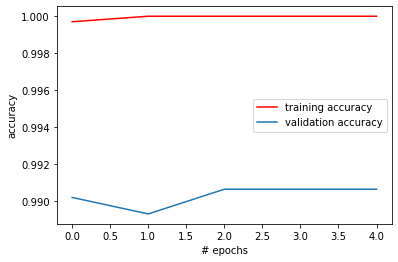

In [41]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [42]:
model.evaluate(testX,testY)

71/71 [==============================] - 518s 7s/step - loss: 0.0345 - accuracy: 0.9907


[0.0344608835875988, 0.9906500577926636]

In [43]:
y_pred = model.predict(testX)
y_pred_label = [np.argmax(i) for i in y_pred]

In [44]:
labels = {
     0 : 'with_mask' ,
     1 : 'without_mask' ,
     2 : 'mask_weared_incorrect',
}

In [45]:
testY[0]

2

In [46]:
labels[y_pred_label[0]]

'mask_weared_incorrect'

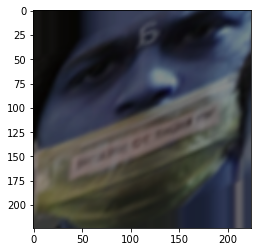

In [47]:
plt.imshow(testX[0])

In [48]:
from sklearn import metrics
mat = metrics.confusion_matrix(testY,y_pred_label)
import seaborn as sns

<AxesSubplot:>

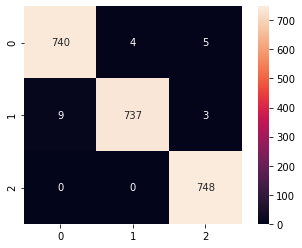

In [49]:
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True)